## Exercises: An Invitation to Analytic Combinatorics in Several Variables

Created by Stephen Melczer

A quick Sage tutorial can be found [here](https://melczer.ca/files/SageIntro.html) (try an interactive version in your browser [here](https://mybinder.org/v2/git/https%3A%2F%2Fgit.uwaterloo.ca%2Fsmelczer%2Fintro-to-sage/HEAD?filepath=A%20Brief%20Introduction%20to%20Sage.ipynb)).

See [https://melczer.ca/textbook](https://melczer.ca/textbook) for further Sage notebooks solving problems in analytic combinatorics in several varibles. 

In particular, [this notebook](https://melczer.ca/files/TextbookCode/Chapter5/Example5-SmoothASM.ipynb) (also available as a [static HTML page](https://melczer.ca/files/TextbookCode/Chapter5/Example5-SmoothASM.html)) gives an algorithm to compute asymptotic terms. Don't use it to solve these exercises, but use it to further check your answers! (Or to compute asymptotics for other problems!)

In [1]:
# Helper function to compute the Hessian matrix M from the function H(vars)
# in the direction R at the point CP, specified by a list of substitutions.
# Copied from melczer.ca/textbook/
def getHes(H,R,vars,CP):
    dd = len(vars)
    V = zero_vector(SR,dd)
    U = matrix(SR,dd)
    M = matrix(SR,dd-1)

    for j in range(dd):
        V[j] = R[j]/R[-1]
        for i in range(dd):
            U[i,j] = vars[i]*vars[j]*diff(H,vars[i],vars[j])/vars[-1]/diff(H,vars[-1])
    for i in range(dd-1):
        for j in range(dd-1):
            M[i,j] = V[i]*V[j] + U[i,j] - V[j]*U[i,-1] - V[i]*U[j,-1] + V[i]*V[j]*U[-1,-1]
            if i == j: M[i,j] = M[i,j] + V[i]
    return M.subs(CP)


# Helper function to compute leading asymptotics of the R-diagonal of G(vars)/H(vars)
# determined by the Main Asymptotic Theorem of Smooth ACSV at the point CP, specified
# by a list of substitutions. We take det(M) as an input that can be computed by the
# above function.
var('n')
def leadingASM(G,H,detM,R,vars,CP):
    dd = len(R)
    lcoeff = -G/vars[-1]/H.diff(vars[-1])
    exp = 1/mul([vars[k]^R[k] for k in range(dd)])^n
    
    ASM = exp * (2*pi*n*R[-1])^((1-dd)/2) / sqrt(detM) * lcoeff
    return ASM.subs(CP)

## Question 1: Delannoy Numbers
The *Delannoy number* $d_{a,b}$ is the number of paths from the origin $(0,0)$ to the point $(a,b)$ using only the steps $\textsf{N}=(0,1)$, $\textsf{E} = (1,0)$, and $\textsf{NE}=(1,1)$.

**(a)** Prove the recurrence 
$$ d_{a,b} = 
\begin{cases} 
1 &: \text{ if $a=0$ or $b=0$} \\
d_{a-1,b} + d_{a,b-1} + d_{a-1,b-1} &:\text{ otherwise}
\end{cases}
$$
Conclude that 
$$ D(x,y) = \sum_{a,b\geq0}d_{a,b}x^ay^b = \frac{1}{1-x-y-xy}. $$

**(b)** Use the Main Theorem of Smooth ACSV to find asymptotics of $d_{n,n}$ as the $(1,1)$-diagonal of $D(x,y)$. What are the critical points in the $(1,1)$ direction? Which are minimal?

**(c)** Use the Main Theorem of Smooth ACSV to find asymptotics of the $(r,s)$-diagonal of $D(x,y)$ for any $r,s>0$.

### Answer to 1a

If $a=b=0$ then we say $d_{0,0}=1$ by convention (there is one way to do nothing). Otherwise, if $a=0$ then there is exactly one walk to $(a,b)$, consisting of $\textsf{N}$ repeated $b$ times. Similarly, if $b=0$ then there is exactly one walk to $(a,b)$, consisting of $\textsf{E}$ repeated $a$ times. Thus, the initial conditions hold.

If $a,b>0$ then a walk ending at $(a,b)$ is 
- a walk ending at $(a-1,b)$ followed by an $\textsf{E}$ step, or
- a walk ending at $(a,b-1)$ followed by an $\textsf{N}$ step, or
- a walk ending at $(a-1,b-1)$ followed by a $\textsf{NE}$ step.

The possibilities are counted by $d_{a-1,b}, d_{a,b-1}, $ and $d_{a-1,b-1}$, respectively, giving the stated recurrence. The recurrence then implies
$$ (1-x-y-xy) \sum_{a,b\geq0}d_{a,b}x^ay^b = 1, $$
proving $D(x,y)=1/(1-x-y-xy)$.

### Answers to 1b and 1c

Part (b) is a special case of part (c), so we simply solve part (c)

In [2]:
# Introduce variables and function
var('x y r s t n')
H = 1 - x - y - x*y
print('We consider the (r,s)-diagonal of')
show('F(x,y) = ', 1/H)

We consider the (r,s)-diagonal of


'F(x,y) = ' -1/(x*y + x + y - 1)

In [3]:
# Solve the critical point equations in direction (r,s)
rts = solve([H,s*x*diff(H,x) - r*y*diff(H,y)],[x,y])

# Print results
print("The critical points in direction (r,s) are")
for k in rts:
    show(k)

The critical points in direction (r,s) are


[x == -(s + sqrt(r^2 + s^2))/r, y == -(r + sqrt(r^2 + s^2))/s]

[x == -(s - sqrt(r^2 + s^2))/r, y == -(r - sqrt(r^2 + s^2))/s]

In [4]:
# When r,s > 0 only one of these points has positive coordinates, which lie in (0,1)
# It is also coordinate-wise smaller than the other critical point
CP = [x == -(s - sqrt(r^2 + s^2))/r, y == -(r - sqrt(r^2 + s^2))/s]

# It is minimal as |x| = |1-y|/|1+y| decreases as y increases in (0,1) when H(x,y) = 0
print('The unique minimal critical point is')
show(CP)

The unique minimal critical point is


[x == -(s - sqrt(r^2 + s^2))/r, y == -(r - sqrt(r^2 + s^2))/s]

In [5]:
# Asymptotics depends on the 1x1 Hessian matrix M
M = getHes(H,[r,s],[x,y],CP)
detM = M.determinant().factor()
print("The matrix M is the 1 x 1 matrix (i.e., constant)")
show(M.factor())

The matrix M is the 1 x 1 matrix (i.e., constant)


[(r^2 + s^2 + sqrt(r^2 + s^2)*r - sqrt(r^2 + s^2)*s)*r/((r - s + sqrt(r^2 + s^2))*s^2)]

In [6]:
# OPTIONAL NOTE: We could have derived M by parametrizing y = g(x) and taking the
# "Hessian" (which is the second derivative in one dimension) of ϕ(t)
g = solve(H,y)[0].rhs()
phi = log(g.subs(x=CP[0].rhs()*exp(I*t)).simplify_full())
print('In this case, M is also the second derivative of the function')
show(phi)
eq = bool(1==(detM/phi.diff(t,t).subs(t==0)).simplify_full())
print('These two expressions equal:', eq)

In this case, M is also the second derivative of the function


log(-(s*e^(I*t) - sqrt(r^2 + s^2)*e^(I*t) + r)/(s*e^(I*t) - sqrt(r^2 + s^2)*e^(I*t) - r))

These two expressions equal: True


In [7]:
# The partial derivative of H with respect to y doesn't vanish where H is zero,
# thus we get the following dominant asymptotics
detM = getHes(H,[r,s],[x,y],CP).determinant().factor()
ASM = leadingASM(1,H,detM,[r,s],[x,y],CP)
print("The dominant asymptotic behaviour in the direction (r,s) is")
show(ASM)
print("For instance, when r = s = 1 we have")
show(ASM.subs(r==1,s==1))

The dominant asymptotic behaviour in the direction (r,s) is


1/2*sqrt(2)*s/(sqrt(pi*n*s)*((-(s - sqrt(r^2 + s^2))/r)^r*(-(r - sqrt(r^2 + s^2))/s)^s)^n*(r - sqrt(r^2 + s^2))*((s - sqrt(r^2 + s^2))/r - 1)*sqrt((r^2 + s^2 + sqrt(r^2 + s^2)*r - sqrt(r^2 + s^2)*s)*r/((r - s + sqrt(r^2 + s^2))*s^2)))

For instance, when r = s = 1 we have


1/4*2^(3/4)/(sqrt(pi*n)*((sqrt(2) - 1)^2)^n*(sqrt(2) - 1))

We can numerically check this asymptotic formula with actual series terms.

In [8]:
# First, define the ring of formal power series (more efficient for computations)
P.<X,Y> =  QQ[['X,Y']] 

# Function to check ratio of actual coefficients to asymptotic approximation
# for x^(N*R) * y^(N*S) where R, S, and N are positive integers
def asmCheck(R,S,N):
    N2 = (R+S)*N
    ser = 1/(1-X-Y-X*Y + O(X^(N2+1)))
    cfs = ser.coefficients()
    return (cfs[X^(R*N)*Y^(S*N)]/ASM.subs(r==R,s==S,n==N)).n()

print("Checking the 50th term on the (r,s)-diagonal with our asymptotic formula,")
print("In direction (1,1) we get ratio", asmCheck(1,1,50))
print("In direction (2,1) we get ratio", asmCheck(2,1,50))
print("In direction (2,3) we get ratio", asmCheck(2,3,50))

Checking the 50th term on the (r,s)-diagonal with our asymptotic formula,
In direction (1,1) we get ratio 0.997656071379095
In direction (2,1) we get ratio 0.998120119323750
In direction (2,3) we get ratio 0.998996193385674


## Question 2: Apéry Asymptotics

Recall from lecture that a key step in Apéry's proof of the irrationality of $\zeta(3)$ is determining the exponential growth of the sequence that can be encoded as the main diagonal
of 
$$ F(x,y,z,t) = \frac{1}{1 - t(1+x)(1+y)(1+z)(1+y+z+yz+xyz)}. $$
Use the Main Theorem of Smooth ACSV to find dominant asymptotics of this sequence.

### Answer to 2

In [9]:
# Introduce variables and function
var('x,y,z,t')
H = 1 - t*(1+x)*(1+y)*(1+z)*(1+y+z+y*z+x*y*z)
R = [1,1,1,1]
vari = [x,y,z,t]

# Get the smooth critical point equations
d = len(vari)
criteqs = [H] + [R[j]*vari[0]*diff(H,vari[0]) - R[0]*vari[j]*diff(H,vari[j]) for j in range(1,d)]
print("The critical point equations are")
show(criteqs)

The critical point equations are


[-(x*y*z + y*z + y + z + 1)*t*(x + 1)*(y + 1)*(z + 1) + 1,
 -(t*(x + 1)*(y + 1)*y*(z + 1)*z + (x*y*z + y*z + y + z + 1)*t*(y + 1)*(z + 1))*x + ((x*z + z + 1)*t*(x + 1)*(y + 1)*(z + 1) + (x*y*z + y*z + y + z + 1)*t*(x + 1)*(z + 1))*y,
 -(t*(x + 1)*(y + 1)*y*(z + 1)*z + (x*y*z + y*z + y + z + 1)*t*(y + 1)*(z + 1))*x + ((x*y + y + 1)*t*(x + 1)*(y + 1)*(z + 1) + (x*y*z + y*z + y + z + 1)*t*(x + 1)*(y + 1))*z,
 (x*y*z + y*z + y + z + 1)*t*(x + 1)*(y + 1)*(z + 1) - (t*(x + 1)*(y + 1)*y*(z + 1)*z + (x*y*z + y*z + y + z + 1)*t*(y + 1)*(z + 1))*x]

In [10]:
# There are two critical points, the one with positive coordinates is minimal
[CP1,CP2] = solve(criteqs,vari)

if t.subs(CP1) > 0:
    CP = CP1
else:
    CP = CP2

print("The critical points are")
show(CP1); show(CP2)
print("Of these, the minimal critical point is")
show(CP)

The critical points are


[t == -58*sqrt(2) - 82,
 x == -sqrt(2) + 1,
 y == -1/2*sqrt(2),
 z == -1/2*sqrt(2)]

[t == 58*sqrt(2) - 82, x == sqrt(2) + 1, y == 1/2*sqrt(2), z == 1/2*sqrt(2)]

Of these, the minimal critical point is


[t == 58*sqrt(2) - 82, x == sqrt(2) + 1, y == 1/2*sqrt(2), z == 1/2*sqrt(2)]

In [11]:
print("Dominant asymptotic behaviour of the main diagonal is")
detM = getHes(H,[1,1,1,1],[x,y,z,t],CP).determinant().factor()
ASM = leadingASM(1,H,detM,[1,1,1,1],[x,y,z,t],CP)
show(ASM)
print("Note: it's possible to algebraically simplify this formula somewhat")

Dominant asymptotic behaviour of the main diagonal is


1/8*sqrt(2)/((pi*n)^(3/2)*((29*sqrt(2) - 41)*(sqrt(2) + 1))^n*(29*sqrt(2) - 41)*(3*sqrt(2) + 4)*sqrt((408*sqrt(2) + 577)/(3*sqrt(2) + 4)^3))

Note: it's possible to algebraically simplify this formula somewhat


In [12]:
# Numerically check the formula (this can take a decent amount of time for large N)
P.<X,Y,Z> =  QQ['X,Y,Z'] 
N = 40
ser = ((1+X)*(1+Y)*(1+Z)*(1+Y+Z+Y*Z+X*Y*Z))^N
rat = (ser[X^N*Y^N*Z^N]/ASM.subs(n==N)).n()
print("When n = {} the ratio of our formula and actual coefficient is".format(N),rat)

When n = 40 the ratio of our formula and actual coefficient is 0.989591444404954


## Question 3: Pathological Directions
**(a)** Find asymptotics of the $(r,s)$-diagonal of $F(x,y) = \frac{1}{1-x-xy}$
for any $0<s<r$.

**(b)** What are the critical points of $F(x,y) = \frac{1}{1-x-xy}$ in the $(r,s)$ direction when $0<r \leq s$? Which are minimal? Characterize the behaviour of the $(r,s)$ diagonal when $0<r \leq s$.

### Answers to 3a and 3b

In [13]:
# Introduce variables and function
var('x y n')
H = 1 - x - x*y

In [14]:
# Solve the critical point equations in direction (r,s) and print results
[CP] = solve([H,s*x*diff(H,x) - r*y*diff(H,y)],[x,y])
print("The critical point in direction (r,s) is")
show(CP)

The critical point in direction (r,s) is


[x == (r - s)/r, y == s/(r - s)]

In [15]:
# Compute asymptotic contribution of this point
detM = getHes(H,[r,s],[x,y],CP).determinant().factor()
ASM = leadingASM(1,H,detM,[r,s],[x,y],CP)
print('If r > s then this point is minimal and the dominant asymptotic behaviour is')
show(ASM)

If r > s then this point is minimal and the dominant asymptotic behaviour is


1/2*sqrt(2)*r/(sqrt(pi*n*s)*(((r - s)/r)^r*(s/(r - s))^s)^n*s*sqrt((r - s)*r/s^2))

If $r < s$ then this point is **not** minimal, and there are **no minimal critical points**. Note that 
$$F(x,y) = 1/(1-x-xy) = \sum_{n \geq 0}x^n(1+y)^n$$ 
so $[x^ay^b]F(x,y)=0$ if $a<b$. In particular, the $(r,s)$-diagonal is zero after the constant term whenever $r<s$. If $r=s$ then we can directly compute $[x^ny^n]F(x,y) = 1$ for all $n$.

In [16]:
# Numerically check our asymptotic formula, using the same approach as Q1
P.<X,Y> =  QQ[['X,Y']] 
def asmCheck(R,S,N):
    N2 = (R+S)*N
    ser = 1/(1-X-X*Y + O(X^(N2+1)))
    cfs = ser.coefficients()
    return (cfs[X^(R*N)*Y^(S*N)]/ASM.subs(r==R,s==S,n==N)).n()

print("Checking the 50th term on the (r,s)-diagonal with our asymptotic formula,")
print("In direction (2,1) we get ratio", asmCheck(2,1,50))
print("In direction (3,2) we get ratio", asmCheck(3,2,50))

Checking the 50th term on the (r,s)-diagonal with our asymptotic formula,
In direction (2,1) we get ratio 0.997503163955105
In direction (3,2) we get ratio 0.998057468890357


## Question 4: A Composition Limit Theorem

An *integer composition* of size $n\in\mathbb{N}$ is an ordered tuple of positive integers (of any length) that sum to $n$. A composition can be viewed as an integer partition where the order of the summands matters. Let $c_{k,n}$ denote the number of compositions of size $n$ that contain $k$ ones. 

**(a)** If you know the symbolic method, species theory, or similar enumerative constructions, prove that 
$$ C(u,x) = \sum_{n,k\geq0}c_{k,n}u^kx^n = \frac{1-x}{1-2x-(u-1)x(1-x)}. $$

**(b)** Prove that the distribution for the number of ones in a composition of size $n$ satisfies a local central limit theorem as $n\rightarrow\infty$. More precisely, find a constant $t>0$ and normal density $\nu_n(s)$ such that 
$$ \sup_{s \in \mathbb{Z}} |t^nc_{s,n} - \nu_n(s)| \rightarrow 0 $$
as $n\rightarrow\infty$.

### Answer to 4a

A composition can be viewed as a sequence of positive integers. Separating and marking the integer 1, the combinatorial class $\mathcal{C}$ has the specification
$$ \mathcal{C} = \text{SEQ}\left(Z\times U \; + \; Z^2 \times \text{SEQ}(Z) \right) $$
giving the generating function
$$ C(u,x) = \frac{1}{1-xu - \frac{x^2}{1-x}} , $$
which simplies to the stated expression. (See *Analytic Combinatorics* by Flajolet and Sedgewick for information on the symbolic method)

In [17]:
var('u x')
(1/(1-x*u-x^2/(1-x)) - (1-x)/(1-2*x-(u-1)*x*(1-x))).simplify_full()

0

### Answer to 4b

In [18]:
# Introduce variables and function
var('u x s')
G = 1 - x
H = 1 - 2*x - (u-1)*x*(1-x)

In [19]:
# We want a critical point where u = 1
# There is only one such point on V
CP = [u==1] + solve(H.subs(u==1),x)
print("H(1,x) = 0 implies", CP)

H(1,x) = 0 implies [u == 1, x == (1/2)]


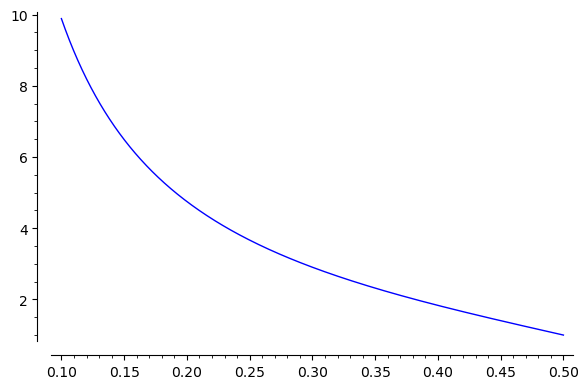

In [20]:
# This point is minimal as H(u,x) = 0 and x in (0,1) implies u increases as x decreases
solve(H,u)[0].rhs().plot(x,0.1,1/2)

In [21]:
# Find the direction for which CP is a critical point, scaled to have final coordinate 1
m = [k.subs(CP) for k in [u*diff(H,u)/x/diff(H,x),1]]
print("The minimal point", CP, "is critical in the direction", m)

The minimal point [u == 1, x == (1/2)] is critical in the direction [1/4, 1]


In [22]:
# Get density for limit theorem
detM = getHes(H,m,[u,x],CP).determinant()
EXP = (s - m[0]*n)^2/detM/2/n
C = -(G/x/diff(H,x)).subs(CP)
nu = C * exp(-EXP) * (2*pi*n)^(-1/2)/sqrt(detM)
print("As n goes to infinity {}^n * c(s,n) approaches".format(x.subs(CP)))
show("ν(s) = \t ", nu)

As n goes to infinity 1/2^n * c(s,n) approaches


'ν(s) = \t ' 1/5*sqrt(5)*sqrt(2)*e^(-1/10*(n - 4*s)^2/n)/sqrt(pi*n)

The following plot shows c(s,n)/2^n vs computed density when n = 200


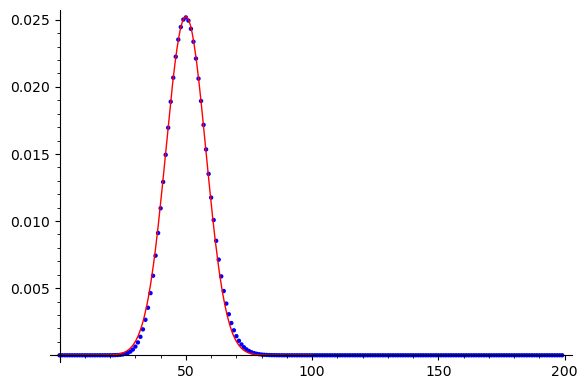

In [23]:
# Plot series terms versus computed density
K.<U> =  QQ['U']
P.<X> =  K[['X']]

# Set the value of n to test
N = 200
mser = (1 - X)/(1 - 2*X - (U-1)*X*(1-X) + O(X^(N+1)))
uvals = mser[N]

plt = point([])
for k in range(N):
    plt += point([k,uvals[k]/2^N])

print("The following plot shows c(s,n)/2^n vs computed density when n =", N)
plt + plot(nu.subs(n==N),s,0,N/2,color='red')

## Question 5
See Section 4.1.4 of [An Invitation to Analytic Combinatorics](https://melczer.ca/files/Melczer-SubmittedManuscript.pdf) for the solutions to (a) - (d) and [the corresponding Sage notebook](https://melczer.ca/files/TextbookCode/Chapter4/Example4-3-5-6-GeneratingWalkGroupsAndGFs.html).

In [24]:
# Introduce variables and function
var('x,y,t')
vari = [x,y,t]
R = [1,1,1]

ST = [[-1,0],[1,0],[0,-1],[0,1]]
S = add([x^i*y^j for (i,j) in ST])
G = (1+x)*(1+y)
H = 1-t*x*y*S

# There are two critical points
d = len(vari)
criteqs = [H] + [R[j]*vari[0]*diff(H,vari[0]) - R[0]*vari[j]*diff(H,vari[j]) for j in range(1,d)]
print("The critical points in the main diagonal direction are")
show(solve(criteqs,vari))

The critical points in the main diagonal direction are


[[x == 1, y == 1, t == (1/4)], [x == -1, y == -1, t == (-1/4)]]

In [25]:
CP = [x==1, y==1, t == 1/4]
print("Dominant asymptotic behaviour of the main diagonal is")
detM = getHes(H,[1,1,1],[x,y,t],CP).determinant().factor()
ASM = leadingASM(G,H,detM,[1,1,1],[x,y,t],CP)
show(ASM)

Dominant asymptotic behaviour of the main diagonal is


4/(pi*(1/4)^n*n)